<img src="https://ucfai.org//ucfai/core/sp20/2020-01-22-linear-regression/linear-regression/banner.png">

<div class="col-12">
    <span class="btn btn-success btn-block">
        Meeting in-person? Have you signed in?
    </span>
</div>

<div class="col-12">
    <h1> Starting with the Basics, Regression </h1>
    <hr>
</div>

<div style="line-height: 2em;">
    <p>by: 
        <strong> None</strong>
        (<a href="https://github.com/jarviseq">@jarviseq</a>)
    
        <strong> None</strong>
        (<a href="https://github.com/bb912">@bb912</a>)
     on 2020-01-22</p>
</div>

First thing first, we to get some packages 

*   matplotlib allows us to graph 
*   numpy is powerful package for data manipulation
*   pandas is a tool for allowing us to interact with large datasets
*   sklearn is what we'll use for making the models
*   !wget grabs the data set we'll be using later

In [1]:
DATA_DIR = "/kaggle/input/ucfai-core-sp20-linear-regression"
# import some important stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import datasets, linear_model

## Basic Example 

The data for this example is arbitrary (we'll use real data in a bit), but there is a clear linear relationship here

Graphing the data will make this relationship clear to see

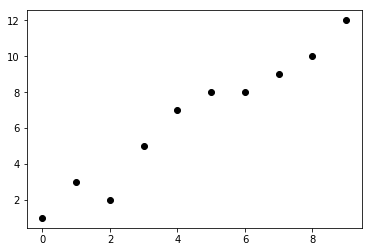

In [2]:
# Get some data 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Let's plot the data to see what it looks like
plt.scatter(x, y, color = "black") 
plt.show()

Here's the meat of the calculations

This is using least squares estimation, which tries to minimize the squared error of the function vs. the training data

SS_xy is the cross deviation about x, and SS_xx is the deviation about x

[It's basically some roundabout algebra methods to optimize a function](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf) 

The concept isn't super complicated but it gets hairy when you do it by hand

In [3]:
# calculating the coefficients

# number of observations/points 
n = np.size(x) 

# mean of x and y vector 
m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
SS_xy = np.sum(y*x - n*m_y*m_x) 
SS_xx = np.sum(x*x - n*m_x*m_x) 

# calculating regression coefficients 
b_1 = SS_xy / SS_xx 
b_0 = m_y - b_1*m_x

#var to hold the coefficients
b = (b_0, b_1)

#print out the estimated coefficients
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 

Estimated coefficients:
b_0 = -0.05862068965517242 
b_1 = 1.457471264367816


But, we don't need to directly program all of the maths everytime we do linear regression

sklearn has built in functions that allows you to quickly do Linear Regression with just a few lines of code

We're going to use sklearn to make a model and then plot it using matplotlib


In [4]:
# Sklearn learn require this shape
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# making the model
regress = linear_model.LinearRegression()
regress.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### And now, lets see what the model looks like

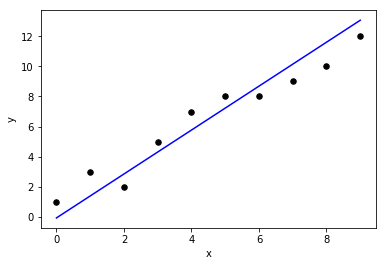

In [5]:
# plotting the actual points as scatter plot 
plt.scatter(x, y, color = "black", 
           marker = "o", s = 30) 

# predicted response vector 
y_pred = b[0] + b[1]*x 

# plotting the regression line 
plt.plot(x, y_pred, color = "blue") 

# putting labels 
plt.xlabel('x') 
plt.ylabel('y') 

# function to show plot 
plt.show()

### So now we can make predictions with new points based off our data

In [6]:
# here we can try out any data point
print(regress.predict([[6]]))

[[8.25454545]]


--------------------------------------------
## Applied Linear Regression 
--------------------------------------------

### The Ames Housing Dataset 
> Ames is a city located in Iowa.
> 
> - This data set consists of all property sales
collected by the Ames City Assessor’s Office between the years
of 2006 and 2010.
> - Originally contained 113 variables and 3970 property sales
pertaining to the sale of stand-alone garages, condos, storage
areas, and of course residential property.
> - Distributed to the public as a means to replace the old Boston
Housing 1970’s data set.  
> - [Link to Original](http://lib.stat.cmu.edu/datasets/boston) 
> - The "cleaned" version of this dataset contains 2930 observations along with 80
predictor variables and two identification variables.

### What was the original purpose of this data set? 

Why did the City of Ames decide to collect this data? 

What does the prices of houses affect?

### What's inside? 

This ”new” data set contains 2930 (n=2930) observations along with 80
predictor variables and two identification variables. 

[Paper linked to dataset](http://jse.amstat.org/v19n3/decock.pdf)

An exhaustive variable breakdown can be found
[here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

### *Quick Summary*
------
Of the 80 predictor variables we have:
> - 20 continuous variables (area dimension)
 - Garage Area, Wood Deck Area, Pool Area
> - 14 discrete variables (items occurring)
 - Remodeling Dates, Month and Year Sold
 > - 23 nominal and 23 ordinal 
 - Nominal: Condition of the Sale, Type of Heating and
Foundation
 - Ordinal: Fireplace and Kitchen Quality, Overall
Condition of the House

### *Question to Answer:*
What is the linear relationship between sale price on above ground
living room area?

But first lets visually investigate what we are trying to predict. 

We shall start our analysis with summary statistics. 

In [7]:
housing_data =  pd.read_csv(f"{DATA_DIR}/train.csv") 

# Mean Sales price 
mean_price = np.mean(housing_data["SalePrice"])
print("Mean Price : " + str(mean_price))

# Variance of the Sales Price 
var_price = np.var(housing_data["SalePrice"], ddof=1)
print("Variance of Sales Price : " + str(var_price))

# Median of Sales Price 
median_price = np.median(housing_data["SalePrice"])
print("Median Sales Price : " + str(median_price))

# Skew of Sales Price 
skew_price = st.skew(housing_data["SalePrice"])
print("Skew of Sales Price : " + str(skew_price))

housing_data["SalePrice"].describe()

Mean Price : 180921.19589041095
Variance of Sales Price : 6311111264.297451
Median Sales Price : 163000.0
Skew of Sales Price : 1.880940746034036


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Another way we can view our data is with a box and whisker plot.

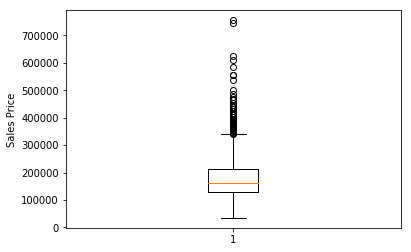

In [8]:
plt.boxplot(housing_data["SalePrice"])
plt.ylabel("Sales Price")
plt.show()

### Now we shall look at sales price on above ground living room area. 

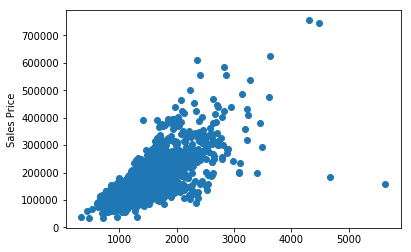

In [9]:
plt.scatter(housing_data["GrLivArea"], housing_data["SalePrice"])
plt.ylabel("Sales Price")
plt.show()

### Finally, lets generate our model and see how it predicts Sales Price!!

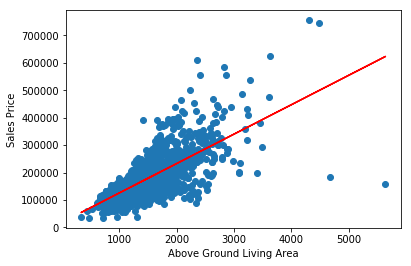

In [10]:
# we need to reshape the array to make the sklearn gods happy
area_reshape = housing_data["GrLivArea"].values.reshape(-1,1)
price_reshape = housing_data["SalePrice"].values.reshape(-1,1)

# Generate the Model
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(area_reshape, price_reshape)
price_prediction = model.predict(area_reshape)

# plotting the actual points as scatter plot 
plt.scatter(area_reshape, price_reshape) 

# plotting the regression line 
plt.plot(area_reshape, price_prediction, color = "red") 

# putting labels 
plt.xlabel('Above Ground Living Area') 
plt.ylabel('Sales Price') 

# function to show plot 
plt.show()

--------------------------------------------

## **Applied Logistic Regression**

--------------------------------------------

In [11]:
# we're going to need a different model, so let's import it
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

for Logistic Regression, we're going to be using a real dataset 

This data set was provided by UCI's Machine Learning Repository: 

*  [Adult Data Set (Also know as Census Income)](https://archive.ics.uci.edu/ml/datasets/Adult)

We already downloaded the dataset at the begining of the notebook, so now let's mess around with it.

but before that, we need to read in the data. pandas has the functions we need to do this
 

In [12]:
# read_csv allow us to easily import a whole dataset
data = pd.read_csv(f"{DATA_DIR}/adult.data", names =["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

# this tells us whats in it 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [13]:
# data.head() gives us some the the first 5 sets of the data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The code below will show us some information about the *continunous* parameters that our dataset contains. 

* Age is Age 

* fnlwgt is final weight, or the number of people that are represented in this group relative to the overall population of this dataset. 

* Education-num is a numerical way of representing Education level

* Capital Gain is the money made investments

* Capital Loss is the loss from investments

* Hours-per-Week is the number of hours worked during a week

In [14]:
# this is the function that give us some quick info about continous data in the dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Now here is the Qustion:
* Which one of these parameters are best in figuring out if someone is going to be making more then 50k a year?
* Make sure you choose a continunous parameter, as categorical stuff isn't going to work 

In [15]:
# put the name of the parameter you want to test
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [16]:
# but before we make our model, we need to modify our data a bit

# little baby helper function
def incomeFixer(x):
    if x == " <=50K":
        return 0
    else:
        return 1

# change the income data into 0's and 1's
data["income"] = data.apply(lambda row: incomeFixer(row['income']), axis=1)

# get the data we are going to make the model with 
x = np.array(data[test])
y = np.array(data["income"])

# again, lets make the scikitlearn gods happy
x = x.reshape(-1,1)

# Making the test-train split
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.25, random_state=42)

NameError: name 'test' is not defined

In [17]:
# now make data model!
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [18]:
# now need to test the model's performance
print(logreg.score(x_test,y_test))

NameError: name 'x_test' is not defined

## Submit to Kaggle Competition

In [19]:
# Run test and submit to kaggle competition!
test_data = pd.read_csv(f"{DATA_DIR}/adult.test", names =["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])
test_data = test_data.drop("income", axis=1)
test_data = test_data.drop(test_data.index[0], axis=0)

#get the data we are going to make the model with 
x_test = np.array(test_data[test])

#again, lets make the scikitlearn gods happy
x_test = x_test.reshape(-1,1)

predictions = logreg.predict(x_test)
predictions = pd.DataFrame({'Category': predictions})

predictions.to_csv('submission.csv', header=['Category'], index_label='Id')

NameError: name 'test' is not defined

## Thank You

We hope that you enjoyed being here today.

Please fill out [this questionaire](https://ucfai.org/feedback) so we can get some feedback about tonight's meeting.

We hope to see you here again next week for our core meeting on *Random Forests and Support Vector Machines*.

### Live in Virtue